### 목표
- 목표정의  
500명의 대한 키와 몸무게 데이터를 활용하여 bmi값 예측하는 모델 만들어보자   
머신러닝 과정 이해해보자

- 머신러닝 종류? 3가지  
지도학습(교사학습, Supervised)  
비지도학습(Unsupervised)  
강화학습(Reinforcement)  


- 머신러닝 학습 과정  
1. 문제 정의  
2. 데이터 수집  
3. 데이터 전처리  
4. EDA(탐색적 데이터 분석)  
5. Model선택, Hyper Parameter 조정  
6. 모델 학습( fit, 데이터에 맞춰서 학습해라 ) 
7. 모델 예측 (predict), 평가(score)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 머신러닝 모델 불러오기
# 머신러닝 패키지 sklearn
from sklearn.neighbors import KNeighborsClassifier # 분류 예측
from sklearn.metrics import accuracy_score # 정확도 측정 도구 ( 성능평가 도구 )

### 데이터불러오기

In [25]:
# 데이터 불러오기
# 컬럼값을 인덱스로 설정해서 불러오기
data = pd.read_csv('./data/bmi_500.csv',index_col='Label')
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [10]:
# 데이터 정보 확인 
# 크기 확인 shape
data.shape # 500 행, 3 컬럼

# info
data.info()
# 결측치 여부 : x
# 데이터 타입 확인 : 키, 몸무게 정수형태(수치값)

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### 데이터 전처리  
- 진행x

#### 탐색적 데이터 분석  
- 데이터를 살펴보자

In [11]:
# 기술통계 : 통계량에 대해서 기술한 것
data.describe()

# 중앙값이 평균값이랑 비슷함으로 이상치의 영향을 받지않고 있다.

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [15]:
# Label 살펴보자
# 클래스의 수는 얼마인가? 6개
data.index.unique()

# Extreme Obesity : 고도비만
# Obesity : 비만
# Overweight : 과체중
# Normal : 정상체중
# Weak : 저체중
# Extremely Weak : 심한 저체중

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [16]:
# 각각의 클래스가 몇개씩 담겨 있는가?
data.index.value_counts()

# 정답 label은 되도록이면 다양성을 유지해야함 - 평향성 유지!

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

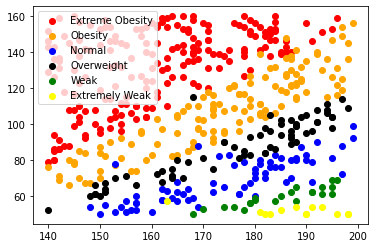

In [30]:
# 레이블을 그래프화해서 살펴보자
# scatter
# Extreme Obesity 산점도 찍어보기
# d = data.loc['Extreme Obesity']  # 행값을 알아서 찾아냄!
# plt.scatter(d['Height'],d['Weight'], color='red', label='ext ob') # label은 기입만 한 상태

# d2 = data.loc['Obesity']  # 행값을 알아서 찾아냄!
# plt.scatter(d2['Height'],d2['Weight'], color='orange', label='ext ob') # label은 기입만 한 상태

# 함수 정의 
def bmi_graph(label,color):
    d = data.loc[label]
    plt.scatter(d['Height'],d['Weight'], color=color, label=label)
    
# 함수 호출 6번
bmi_graph('Extreme Obesity','red')
bmi_graph('Obesity','orange')
bmi_graph('Normal','blue')
bmi_graph('Overweight','black')
bmi_graph('Weak','green')
bmi_graph('Extremely Weak','yellow')

plt.legend() # 범례표시
plt.show()

### 모델링  
- 문제데이터와 답 데이터로 분리

In [43]:
# 이런 키값과 이런 몸무게 값 있으면
X = data[['Height', 'Weight']]
#X = data.loc[:,'Height':'Weight']
# 이런 bmi 답이 나온다
y = data.index
display(X.head())
display(y[:5])

,Height,Weight
Label,,
Obesity,174,96
Normal,189,87
Obesity,185,110
Overweight,195,104
Overweight,149,61


Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight'], dtype='object', name='Label')

- train데이터와 test테이터 분리

In [45]:
# 2차원이라 대문자, 1차원이라 소문자
X_train = X.iloc[:350] # 훈련용 문제 
y_train = y[:350] # 훈련용 답

X_test = X.iloc[350:] # 테스트 문제
y_test = y[350:] # 테스트 답

In [47]:
# 데이터 크기 확인
print('훈련용 문제 : ',X_train.shape)
print('훈련용 답 : ', y_train.shape)
print('테스트용 문제 : ',X_test.shape)
print('테스트용 답 : ', y_test.shape)

훈련용 문제 :  (350, 2)
훈련용 답 :  (350,)
테스트용 문제 :  (150, 2)
테스트용 답 :  (150,)


In [48]:
knn_model = KNeighborsClassifier(n_neighbors =5) 
# 이웃의 개수 : 5개 (기본값)

In [60]:
# knn_model 학습하기
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
# knn_model 예측하기
pre = knn_model.predict(X_test)
knn_model.predict(X_test).shape

(150,)

In [63]:
# knn_model 평가하기
# acaccuracy_score(실제답, 예측값)
accuracy_score(y_test, pre)
# knn_model.score(테스트문제, 테스트답)
knn_model.score(X_test, y_test)

0.9066666666666666